In [24]:
import pandas
import scipy
import sklearn
import keras
import tensorflow

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GroupKFold


keras.__version__

'3.0.5'

In [25]:
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

dataset = pandas.read_csv(folder_path + '11-03-minmax_normalised_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'usual_wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep'])

# split into input (X) and output (Y) variables
X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'steps_per_hour', 'totalDistance', 'dwrTotalDuration', 'dist_per_hour', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons', 'trouble_falling_asleep', 'time_falling_asleep', 'wake_ups', 'total_time_awake', 'total_minutes_asleep']].values
y = dataset['ssq_score'].values


In [26]:
gkf = GroupKFold(n_splits=5)

groups = dataset['participantId'].values

In [27]:
l1size = 3

In [28]:
print(len(X), len(y))


535 535


In [32]:


for train_idx, test_idx in gkf.split(X, y, groups):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = Sequential([
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    optm = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
    model.compile(optimizer=optm, loss='mse', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=400, batch_size=1, validation_data=(X_test, y_test))


Epoch 1/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1387 - loss: 0.0800 - val_accuracy: 0.8707 - val_loss: 0.0845
Epoch 2/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1833 - loss: 0.0623 - val_accuracy: 0.8707 - val_loss: 0.0823
Epoch 3/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2287 - loss: 0.0694 - val_accuracy: 0.8707 - val_loss: 0.0780
Epoch 4/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1523 - loss: 0.0646 - val_accuracy: 0.8707 - val_loss: 0.0639
Epoch 5/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1987 - loss: 0.0682 - val_accuracy: 0.8707 - val_loss: 0.0617
Epoch 6/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1576 - loss: 0.0616 - val_accuracy: 0.8707 - val_loss: 0.0625
Epoch 7/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2056 - loss: 0.0612 - val_accuracy: 0.8707 - val_loss: 0.0509
Epoch 8/400
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2086 - loss: 0.0629 - val_accu

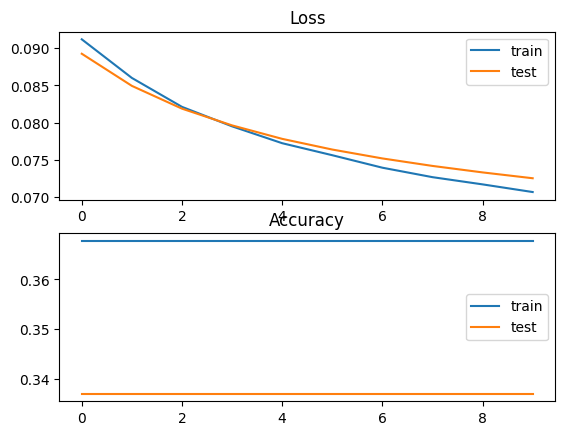

In [30]:
# plot loss during training
from matplotlib import pyplot


pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
